In [27]:
import pandas as pd 
import nltk
from collections import Counter
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Reading in the data pulled from kaggle with 50,000 movie reviews
data = pd.read_csv('reviews.csv')

In [3]:
#Taking a look at some basic info on the dataset
data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [4]:
data.index

RangeIndex(start=0, stop=50000, step=1)

In [5]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
data.dtypes

review       object
sentiment    object
dtype: object

In [7]:
#equally distributed positive and negative reviews will be helpful in the modeling
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
print(type(data['sentiment'].iloc[0]))

<class 'str'>


In [10]:
print(type(data['review'].iloc[0]))

<class 'str'>


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#Creating a function to split all of the reviews into their individual word tokens, removing all punctuation
def clean_and_tokenize(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [13]:
#applying the function to the tokens in the dataframe 
data['tokens'] = data['review'].apply(clean_and_tokenize)

In [14]:
data.tail()

,review,sentiment,tokens
49995,I thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, wasnt, crea..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,"[im, going, disagree, previous, comment, side,..."
49999,No one expects the Star Trek movies to be high...,negative,"[one, expects, star, trek, movies, high, art, ..."


In [61]:
#Creating a list of all the tokens to be able to see some quick data on the tokens
all_tokens = data['tokens'].explode().tolist()

In [62]:
#Using a counter to get a count of the most utilized tokens to do some visualization
token_count = Counter(all_tokens)
token_counts_df = pd.DataFrame(token_count.items(), columns = ['token', 'count'])
token_counts_df.sort_values('count', ascending = False, inplace = True)
token_counts_df.head()

,token,count
294,movie,83510
306,film,74453
0,one,51024
314,like,38989
397,good,28569


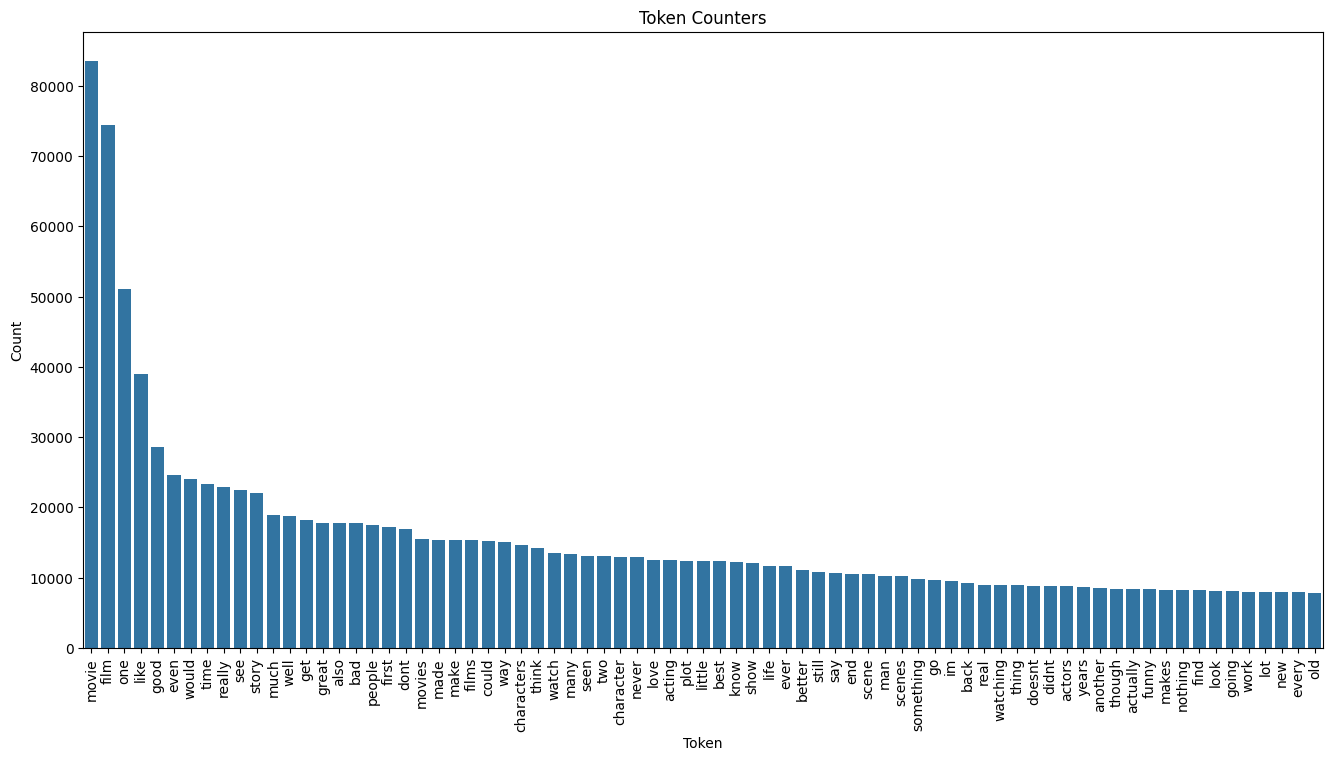

In [52]:
#Visualizing the top 75 used tokens throughout all reviews 
df_subset = token_counts_df.head(75)
plt.figure(figsize=(16, 8))
sns.barplot(x = 'token', y = 'count', data = df_subset)
plt.title('Token Counters')
plt.xlabel('Token')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [38]:
#Looking at some details on the counter, I noticed that there are an exceptional number of 
#tokens with a count of only 1 or a couple.  Looking into these, I notice that they are mostly 
#typos.  Its not until 4 uses where I start noticing some actual words.
token_counts_df.info

<bound method DataFrame.info of                  token   count
13                  br  113794
295              movie   83510
307               film   74453
0                  one   51024
315               like   38989
...                ...     ...
102331      objectprop       1
102329      myselfyeah       1
102328  introtutorials       1
102322         330ambr       1
181542      yosemitebr       1

[181543 rows x 2 columns]>

In [39]:
token_counts_df.tail(100)

,token,count
102399,vanquishbr,1
102397,ladyboyfriends,1
102396,kellysclara,1
102395,insidenow,1
102394,axethe,1
...,...,...
102331,objectprop,1
102329,myselfyeah,1
102328,introtutorials,1
102322,330ambr,1


In [64]:
words_to_remove = token_counts_df[token_counts_df['count']<4]['token']

In [59]:
token_counts_df.info

<bound method DataFrame.info of              token  count
294          movie  83510
306           film  74453
0              one  51024
314           like  38989
397           good  28569
...            ...    ...
19439     cardonas      4
8956         fakey      4
29272   matsushima      4
126130     darrens      4
8910         abner      4

[51712 rows x 2 columns]>

In [58]:
token_counts_df.tail(100)

,token,count
119603,gulager,4
49218,anatomically,4
28863,pendragon,4
49346,providebr,4
48350,purdoms,4
...,...,...
19439,cardonas,4
8956,fakey,4
29272,matsushima,4
126130,darrens,4


In [63]:
#br was the most common token initially.  After looking at the excel file, br seems to be some 
#odd replacement for punctuation, so I am removing all cases of the token br
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item != 'br'])

In [65]:
words_to_remove

113023         millandbr
59517      maharashtrian
59536          upgrading
116064           rantzen
92343        happyending
               ...      
102330        objectprop
102328        myselfyeah
102327    introtutorials
102321           330ambr
181541        yosemitebr
Name: token, Length: 129830, dtype: object

In [66]:
#removing all tokens that occur less than 4 times
data['tokens'] = data['tokens'].apply(lambda x: [item for item in x if item not in words_to_remove])

In [67]:
data.to_pickle('data_cleaned.pkl')

In [69]:
data.isnull().sum()

review       0
sentiment    0
tokens       0
dtype: int64